In [6]:
# !pip install langchain-groq

In [2]:
from langchain_groq import ChatGroq 
from langchain_core.output_parsers import StrOutputParser

In [3]:
api = open('groq.txt')
api_key = api.read()


model = ChatGroq(api_key= api_key , streaming=True, model = 'llama-3.2-90b-vision-preview')

In [3]:
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, SystemMessagePromptTemplate

      
    

In [4]:
system = SystemMessagePromptTemplate.from_template("you are ai assistance")
human = HumanMessagePromptTemplate.from_template("{input}")




chat_template = ChatPromptTemplate.from_messages([system, human])
chain = chat_template | model

input1 = input()

prompt = {'input': input1}
chain.invoke(prompt)

 ai


AIMessage(content='Artificial intelligence (AI) refers to the development of computer systems that can perform tasks that typically require human intelligence, such as:\n\n1. Learning: AI systems can learn from data and improve their performance over time.\n2. Problem-solving: AI systems can analyze problems and generate solutions.\n3. Reasoning: AI systems can draw conclusions based on data and rules.\n4. Perception: AI systems can interpret and understand data from sensors, such as images and speech.\n\nAI has many applications, including:\n\n1. Virtual assistants: AI-powered virtual assistants, such as Siri and Alexa, can perform tasks and answer questions.\n2. Image recognition: AI-powered image recognition systems can identify objects and people in images.\n3. Natural language processing: AI-powered NLP systems can understand and generate human language.\n4. Robotics: AI-powered robots can perform tasks that require physical interaction, such as assembly and navigation.\n5. Predic

In [24]:
from langchain.document_loaders import CSVLoader
from langchain.document_loaders import DirectoryLoader

In [25]:
loader = DirectoryLoader(path= './.' , glob='*.csv' , show_progress=True , loader_cls = CSVLoader )
load = loader.load()
print(len(load))

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 497.49it/s]

50


In [238]:
from langchain_text_splitters import  RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size= 1000,
    chunk_overlap=500
)

In [240]:
chunks = text_splitter.split_documents(load)
len(chunks)

50

In [242]:
print(chunks[0])

page_content='R&D Spend: 165349.2
Administration: 136897.8
Marketing Spend: 471784.1
State: New York
Profit: 192261.83' metadata={'source': '50_Startups.csv', 'row': 0}


In [244]:
from langchain_community.vectorstores import FAISS
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embedding  = GoogleGenerativeAIEmbeddings(model = 'models/embedding-001', google_api_key=api_key_gemini )
vector_store = FAISS.from_documents(chunks , embedding)



In [245]:
results = vector_store.similarity_search(
    "how many startups",
    k=2,
    filter={"source": "50_Startups.csv"},
)
for res in results:
    print(f"* {res.page_content} [{res.metadata}]")

* R&D Spend: 44069.95
Administration: 51283.14
Marketing Spend: 197029.42
State: California
Profit: 89949.14 [{'source': '50_Startups.csv', 'row': 37}]
* R&D Spend: 15505.73
Administration: 127382.3
Marketing Spend: 35534.17
State: New York
Profit: 69758.98 [{'source': '50_Startups.csv', 'row': 43}]


In [246]:
def retriver(query):
    retrival = vector_store.as_retriever()
    context = retrival.invoke(query)
    return "\n\n".join([doc.page_content for doc in context])

In [260]:
prompt = """Your are helpfull ai assistant. Your name is qa Bot.  Answer the question based on the context : {context}. Answer the question {question}. """

chat_template = ChatPromptTemplate.from_template(prompt)


In [262]:
from langchain_core.runnables import RunnablePassthrough

custom_chain = {"context" : retriver, "question": RunnablePassthrough()}  | chat_template | model

In [264]:
print(custom_chain.invoke("how many startup company records").content)

There are 4 startup company records.


In [265]:
print(custom_chain.invoke("which state has max profit").content)


Based on the given data, to find the state with the maximum profit, I'll analyze the profit values for each state.

For Florida: 
1. 132602.65
2. 155752.6
3. 141585.52

For New York: 
1. 108552.04

The maximum profit for Florida is 155752.6 and for New York is 108552.04. Comparing these two, the maximum profit is from Florida with a value of 155752.6.

So, the state with the maximum profit is Florida.


In [266]:
print(custom_chain.invoke("how many state has max profit").content)


Based on the data provided, there are two states mentioned: New York and Florida. 

The maximum profit is 155752.6, which is associated with the state of Florida.

Since Florida has multiple entries with varying profits, let's compare the profits for each state:

New York: 108552.04
Florida: 
- 141585.52
- 132602.65
- 155752.6

All the maximum profits are associated with the state of Florida. Therefore, the answer to the question is that there is only 1 state with the maximum profit, which is Florida.


In [267]:
print(custom_chain.invoke("how many state").content)


Based on the given data, I can see that there are two states mentioned: 

1. New York (3 times)
2. California (1 time)

So, the answer is 2. There are 2 unique states.


In [268]:
print(custom_chain.invoke("give me the minimum profit state").content)


Based on the given data, I can analyze the profit for each state. 

- New York: 108552.04
- Florida: 
  - 132602.65
  - 141585.52
  - 155752.6

The minimum profit is associated with the state 'New York' with a profit of 108552.04.


In [274]:
print(custom_chain.invoke("how many states and there names").content)


There are 3 unique states in the given data. 

The names of the states are: 

1. New York 
2. Florida 
3. California


In [276]:
print(custom_chain.invoke("which states has highest sales").content)


To determine the state with the highest sales, we need to calculate the total sales for each state. Since the total sales are not provided directly, we can calculate it by subtracting the costs (R&D Spend, Administration, and Marketing Spend) from the profit for each state. However, we can also simply add the costs and compare them with the given profits to infer the total sales.

Let's calculate the costs for each state:

1. Florida (first entry):
   R&D Spend: 153441.51
   Administration: 101145.55
   Marketing Spend: 407934.54
   Total Costs: 662521.60
   Profit: 191050.39
   Total Sales: 853571.99

2. New York:
   R&D Spend: 94657.16
   Administration: 145077.58
   Marketing Spend: 282574.31
   Total Costs: 522308.05
   Profit: 125370.37
   Total Sales: 647678.42

3. California:
   R&D Spend: 44069.95
   Administration: 51283.14
   Marketing Spend: 197029.42
   Total Costs: 294382.51
   Profit: 89949.14
   Total Sales: 384331.65

4. Florida (second entry):
   R&D Spend: 61994.48
  

In [282]:
print(custom_chain.invoke("which states has highest sales what is the sales recorded at that particular state").content)


To determine which state has the highest sales, we need to calculate the total sales for each state. Since we don't have the total revenue or sales data directly, we can calculate it by adding the expenses (R&D Spend, Administration, and Marketing Spend) and then adding the profit.

Let's calculate the total sales for each state:

**New York:**

1. R&D Spend: 94657.16 + 77044.01 = 171701.17
Administration: 145077.58 + 99281.34 = 244358.92
Marketing Spend: 282574.31 + 140574.81 = 423149.12
Total Expenses: 171701.17 + 244358.92 + 423149.12 = 839209.21
Profit: 125370.37 + 108552.04 = 233922.41
Total Sales: 839209.21 + 233922.41 = 1073131.62

**Florida:**

1. R&D Spend: 153441.51 + 61994.48 = 215435.99
Administration: 101145.55 + 115641.28 = 216786.83
Marketing Spend: 407934.54 + 91131.24 = 499065.78
Total Expenses: 215435.99 + 216786.83 + 499065.78 = 931288.6
Profit: 191050.39 + 99937.59 = 291988
Total Sales: 931288.6 + 291988 = 1223276.6

Comparing the total sales for both states, we can

In [283]:
print(custom_chain.invoke("which states has highest sales what is the sales recorded at that particular state, consider all the sales").content)


Based on the given data, we can calculate the total sales for each record by adding the R&D Spend, Administration, Marketing Spend, and Profit. 

Record 1: 
Total Spend = R&D Spend + Administration + Marketing Spend = 94657.16 + 145077.58 + 282574.31 = 471309.05
However, this is not the total sales as the profit is not the sales. To calculate sales, we need to add the total spend and the profit. 
Sales = Total Spend + Profit (revenue generated) = Total Spend - Profit is the cost, so we add profit to get the sales.
 Sales = 471309.05 -  (125370.37 is profit and not cost, so we add it to get the sales) 
 Sales = 471309.05 + 125370.37 = 596679.42

Record 2: 
Total Spend = 1000.23 + 124153.04 + 1903.93 = 127057.2
Sales = Total Spend + Profit = 127057.2 + 64926.08 = 191983.28

Record 3: 
Total Spend = 65605.48 + 153032.06 + 107138.38 = 226775.92
Sales = Total Spend + Profit = 226775.92 + 101004.64 = 327780.56

Record 4: 
Total Spend = 77044.01 + 99281.34 + 140574.81 = 318900.16
Sales = Tota

In [212]:
print(custom_chain.invoke("summeries the report").content)


Summary of the Report:

The report appears to be a financial summary of a company's expenses and profits, broken down by state and different expense categories. Here are the key findings:

**State-wise Breakdown:**

* Florida: 3 entries, with total expenses and profits as follows:
	+ Total R&D Spend: $162,903.97
	+ Total Administration: $349,656.45
	+ Total Marketing Spend: $894,368.53
	+ Total Profit: $264,621.92
* New York: 1 entry, with total expenses and profits as follows:
	+ Total R&D Spend: $77,044.01
	+ Total Administration: $99,281.34
	+ Total Marketing Spend: $140,574.81
	+ Total Profit: $108,552.04

**Category-wise Breakdown:**

* R&D Spend: Total $239,948.98, with an average of $59,987.25 per entry
* Administration: Total $449,937.79, with an average of $112,484.45 per entry
* Marketing Spend: Total $1,034,943.34, with an average of $258,735.84 per entry
* Profit: Total $373,174.96, with an average of $93,293.74 per entry


In [158]:
print(custom_chain.invoke("draw a single the bar graph between state and profit").content)


New York: 205031.55 
 Florida: 288355.25


In [70]:
print(custom_chain.invoke("which states has minimum sales what is the sales recorded at that particular state").content)

Based on the given data, I'll first calculate the total sales for each state by adding R&D Spend, Administration, and Marketing Spend. Then, I'll find the state with the minimum sales.

For New York:
- R&D Spend: 94657.16 + 77044.01 = 171701.17
- Administration: 145077.58 + 99281.34 = 244358.92
- Marketing Spend: 282574.31 + 140574.81 = 423149.12
- Total Sales for New York: 171701.17 + 244358.92 + 423149.12 = 839209.21
- Average Sales for New York (2 records): 839209.21 / 2 = 419604.61

For Florida:
- R&D Spend: 119943.24 + 27892.92 = 147836.16
- Administration: 156547.42 + 84710.77 = 241258.19
- Marketing Spend: 256512.92 + 164470.71 = 420983.63
- Total Sales for Florida: 147836.16 + 241258.19 + 420983.63 = 810077.98
- Average Sales for Florida (2 records): 810077.98 / 2 = 405038.99

Comparing the average sales for both states, Florida has the minimum sales, with the average sales recorded at approximately 405038.99.

However, since you asked for the 'sales recorded at that particular

In [ ]:
print(custom_chain.invoke("how many states and there names").content)

In [31]:
# ! pip install langchain_experimental

In [8]:
from langchain_experimental.agents import create_csv_agent

chat =  create_csv_agent(
    model,
    "50_Startups.csv",
    # agent_type = "ZERO_SHOT_REACT_DESCRIPTION",
    allow_dangerous_code=True
)


response = chat.invoke("how many records")
print(response)


{'input': 'how many records', 'output': 'There are 50 records in the dataframe.'}


In [14]:
response['output']

'There are 50 records in the dataframe.'

In [16]:

response = chat.invoke("explain summary")
response , response['output']


({'input': 'explain summary',
  'output': "The summary of the dataframe provides an overview of the financial performance of companies in three states. The mean and standard deviation of financial metrics such as 'R&D Spend', 'Administration', 'Marketing Spend', and 'Profit' give an idea of the average and variability of these metrics across all companies. The minimum and maximum values for these metrics suggest that there may be some companies that are not spending anything in certain areas, and some companies that are performing much better than others."},
 "The summary of the dataframe provides an overview of the financial performance of companies in three states. The mean and standard deviation of financial metrics such as 'R&D Spend', 'Administration', 'Marketing Spend', and 'Profit' give an idea of the average and variability of these metrics across all companies. The minimum and maximum values for these metrics suggest that there may be some companies that are not spending anyth

In [18]:
response = chat.invoke("explain summary of the document")
response , response['output']


({'input': 'explain summary of the document',
  'output': "The dataframe contains 50 entries across 5 columns, including R&D Spend, Administration, Marketing Spend, State, and Profit. The columns are mostly numerical, with the exception of the 'State' column, which contains string values. The mean values for the numerical columns range from approximately 73,721 to 211,025. The standard deviation values indicate the spread of the data. The top three states by count are New York (17), California (17), and Florida (16)."},
 "The dataframe contains 50 entries across 5 columns, including R&D Spend, Administration, Marketing Spend, State, and Profit. The columns are mostly numerical, with the exception of the 'State' column, which contains string values. The mean values for the numerical columns range from approximately 73,721 to 211,025. The standard deviation values indicate the spread of the data. The top three states by count are New York (17), California (17), and Florida (16).")

In [28]:
response = chat.invoke("hi")
response ,response['output']

({'input': 'hi', 'output': 'hi'}, 'hi')

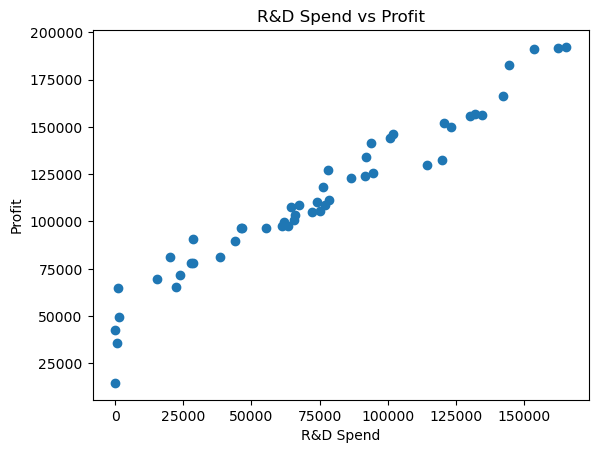

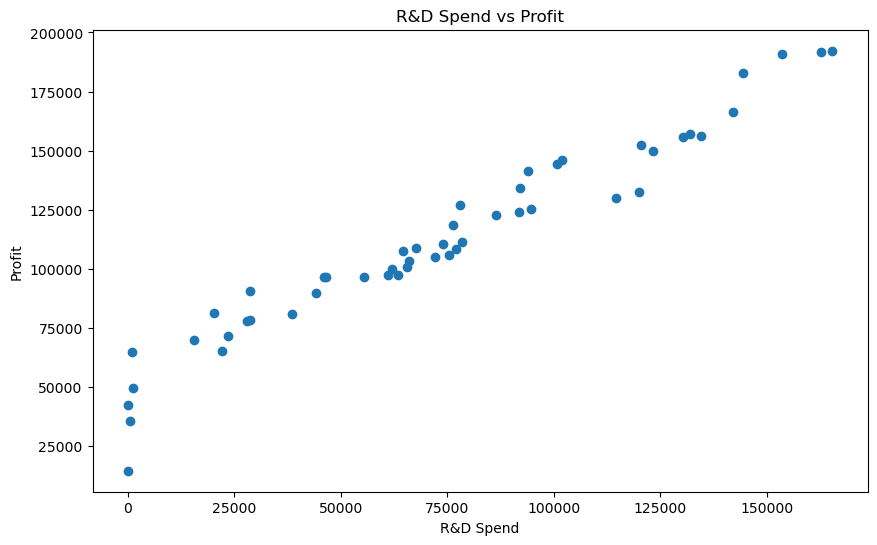

({'input': 'generate a image using the data',
  'output': "A scatter plot has been generated using the data in the 'R&D Spend' and 'Profit' columns. The x-axis represents the 'R&D Spend' and the y-axis represents the 'Profit'. The plot can be used to visualize the relationship between the two columns and identify any correlations."},
 "A scatter plot has been generated using the data in the 'R&D Spend' and 'Profit' columns. The x-axis represents the 'R&D Spend' and the y-axis represents the 'Profit'. The plot can be used to visualize the relationship between the two columns and identify any correlations.")

In [34]:
response = chat.invoke("generate a image using the data")
response ,response['output']

In [32]:
type(response)

dict

In [73]:
response = chat.run("how many states")
print(response)

There are 3 unique states in the dataframe.


In [74]:
response = chat.run("how many states and there names")
print(response)

There are 3 states in the dataframe: 'New York', 'California', and 'Florida'.


In [86]:
response = chat.run("which states has highest sales")
print(response)

Agent stopped due to iteration limit or time limit.


In [280]:
response = chat.run("which states has highest sales what is the sales recorded at that particular state, explain it how")
print(response)

The state with the highest sales is Florida with a total sales of 7197063.44, which is calculated by summing up 'R&D Spend', 'Administration', and 'Marketing Spend' for each state.


In [80]:
response = chat.run("summeries the report")
print(response)

The report has 50 entries, with a mean R&D Spend of $73,722, a mean Administration cost of $121,345, and a mean Marketing Spend of $211,025. The mean Profit is $112,013. The 'State' column has three unique values: New York (17 entries), California (17 entries), and Florida (16 entries).


In [ ]:
response = chat.run("draw a single the bar graph between state and profit")
print(response)

In [81]:
response = chat.run("which states has minimum sales what is the sales recorded at that particular state")
print(response)

The state with the minimum sales is California, and the sales recorded at that particular state is 14681.4
